# Ising 1D
## Esercizi 06

Abbiamo studiato un sistema con $N=50$ spin e un parametro di interazione $J=1$. Definisco innanzitutto le soluzioni esatte del modello di Ising monodimensionale, che verranno poi usate per confrontare i risultati ottenuti dalla simulazione. Le unità di misura considerate sono $\mu_B=1$ e $k_B=1$.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Ns = 50
J=1.0


def u(T):
    th = np.tanh(J/T)
    thN= th**Ns
    ch = 1/th
    e = -J*( th + ch*thN )/( 1 + thN )
    return e

def m(T,h):
    b = 1/T

    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**Ns + l2**Ns
    M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
            + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
    return M
    
    
def c(T):
    beta = 1/T
    th = np.tanh(J/T)
    thN= th**Ns
    ch = 1/th
    heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
    return heat
    
def chi(T):
    th = np.tanh(J/T)
    beta = 1/T
    thN = th**Ns
    chi = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
    return chi
    

**NB: Nel seguito, uno "step" corrisponde al tentativo di cambiare $N=50$ spin (non necessariamente tutti diversi).**

## Equilibrazione

L'idea alla base è quella di campionare delle configurazioni del sistema, le cui probabilità sono determinate dal peso di Boltzmann. Entrambi i metodi di campionamento (Metropolis e Gibbs) si basano sull'algoritmo di Metropolis. Sappiamo quindi che la distribuzione di probabilità che vogliamo campionare viene raggiunta al limite; quindi, partendo da una configurazione iniziale (abbiamo scelto una configurazione iniziale in cui gli spin sono distribuiti casualmente, equivalente quindi a $T=\infty$), ci sarà un transiente iniziale in cui il sistema raggiunge l'equilibrio. Il primo passo da fare è quindi quello di verificare quando il sistema raggiunge questo equilibrio; soltanto dopo averlo raggiunto possiamo infatti utilizzare le configurazioni estratte per calcolare le medie di ensemble alla temperatura desiderata.

### Metropolis sampling

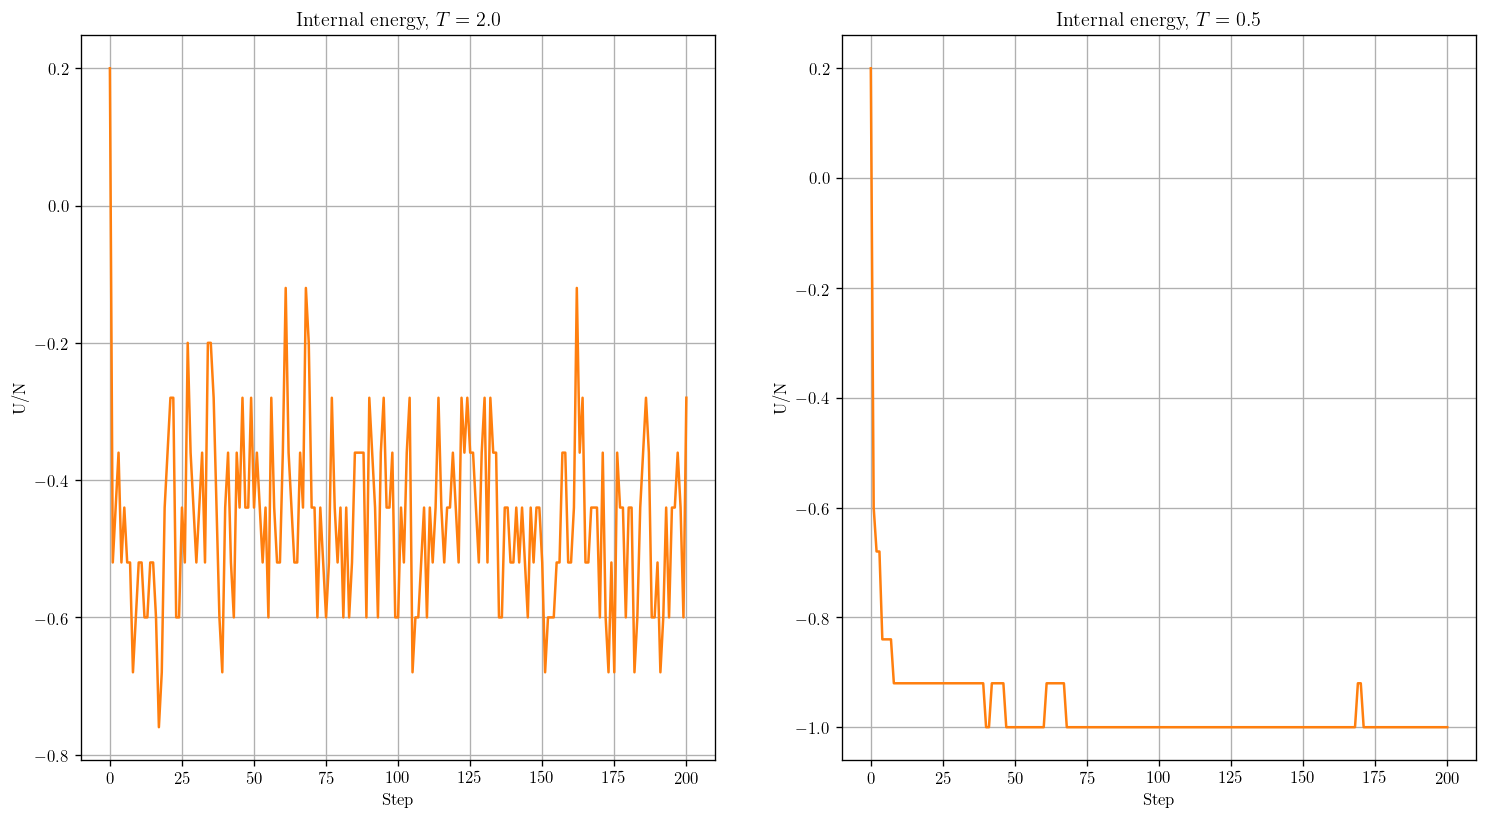

In [2]:
eq_U_Thigh=np.loadtxt("Ex_06_1/Equilibration/Metropolis/output_U_high.dat")
eq_U_Tlow=np.loadtxt("Ex_06_1/Equilibration/Metropolis/output_U_low.dat")


plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig, ax=plt.subplots(1,2, figsize=(15,8), dpi=120)

ax[0].plot(eq_U_Thigh,color="C1")
ax[1].plot(eq_U_Tlow,color="C1")

ax[0].set_title("Internal energy, $T=2.0$")
ax[1].set_title("Internal energy, $T=0.5$")
ax[0].set_ylabel("U/N")
ax[0].set_xlabel("Step")
ax[1].set_ylabel("U/N")
ax[1].set_xlabel("Step")
ax[0].grid(True)
ax[1].grid(True)
    
plt.show()

Come si può notare, l'equilibrio viene raggiunto molto velocemente in entrambi i casi limite ($T=2.0$ e $T=0.5$). Il procedimento più corretto da seguire sarebbe quello di verificare che queste configurazioni non siano uno stato metastabile del sistema (cosa che si può fare usando una configurazione iniziale diversa, ad esempio scegliendo un altro seme per il generatore di numeri casuali) e poi utilizzare la configurazione di equilibrio come configurazione iniziale per effettuare le misure vere e proprie. 

Tuttavia, considerata la semplicità del sistema in esame, ho seguito un'altra strada che richiede meno tempo (ripetere quanto appena detto per ogni temperatura considerata e per entrambi i sistemi mi è sembrato eccessivo): ho inserito tra i parametri esterni da dare in input al programma una variabile intera che corrisponde a un numero di passi da fare quando viene inizializzato il sistema. Una volta terminati questi passi, stampo l'energia media per spin della configurazione a cui il sistema è arrivato, che poi confronto con il valore finale delle misure "vere" per assicurarmi che la configurazione iniziale fosse ragionevolmente vicina a quella di equilibrio. Così facendo mantengo un minimo di controllo sul raggiungimento dell'equilibrio senza studiare nei minimi dettagli l'equilibrio del sistema ad ogni temperatura. Ovviamente questa soluzione presuppone che il sistema arrivi a equilibrio dopo un numero relativamente basso di passi (molto più basso del numero totale di passi per la misurazione vera e propria), ma mi è sembrato un compromesso ragionevole

Per le simulazioni vere e proprie ho utilizzato $N_{eq}=200$ passi per equilibrare il sistema.

Da questi grafici è possibile anche ricavare l'ordine di grandezza delle fluttuazioni delle grandezze in gioco, da considerare per il data blocking.?

### Gibbs sampling

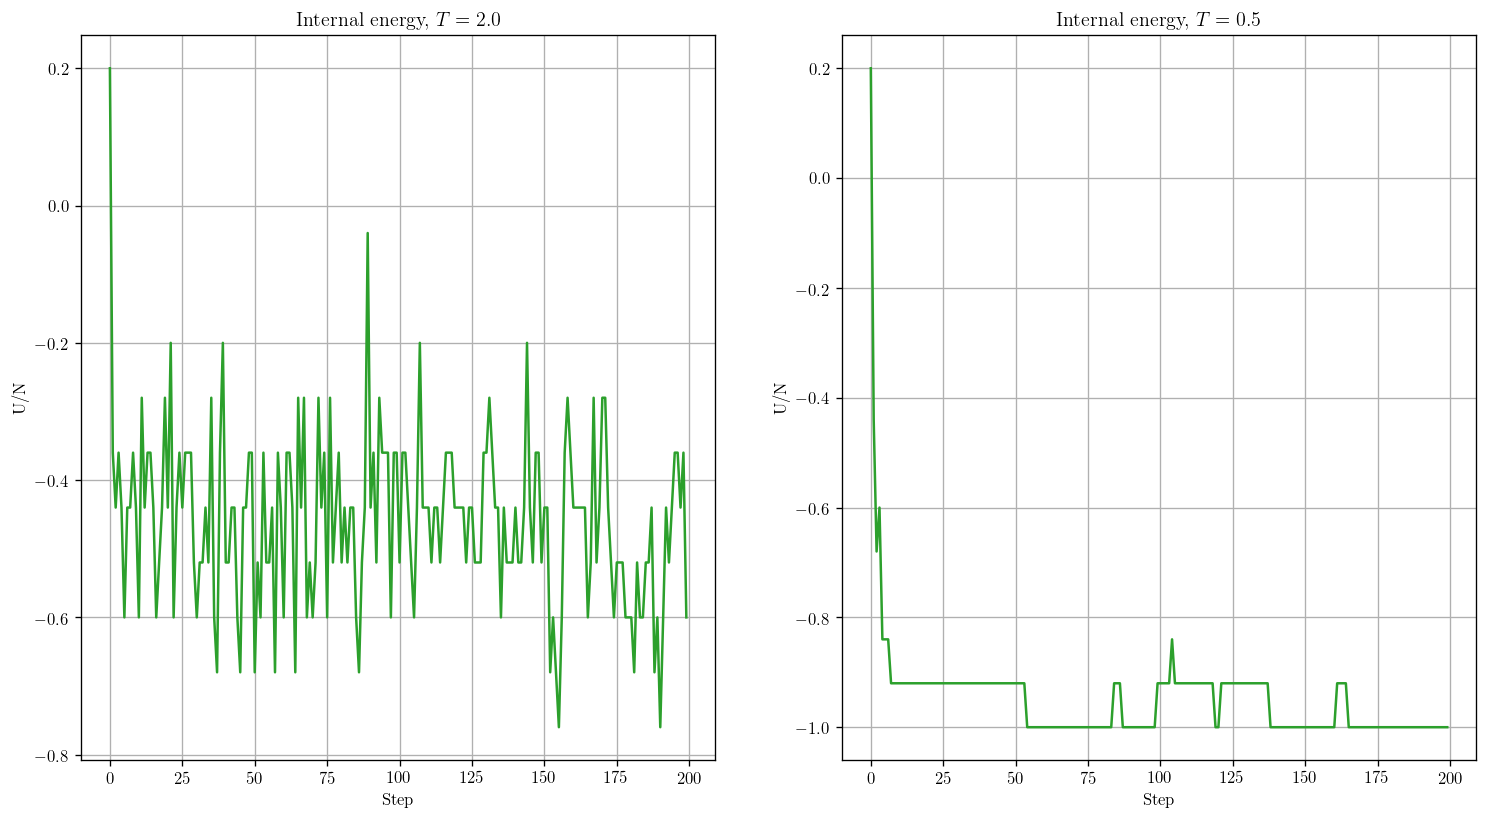

In [3]:
eq_U_Thigh=np.loadtxt("Ex_06_1/Equilibration/Gibbs/output_U_high.dat")
eq_U_Tlow=np.loadtxt("Ex_06_1/Equilibration/Gibbs/output_U_low.dat")


plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig, ax=plt.subplots(1,2, figsize=(15,8), dpi=120)

ax[0].plot(eq_U_Thigh ,color="C2")
ax[1].plot(eq_U_Tlow, color="C2")

ax[0].set_title("Internal energy, $T=2.0$")
ax[1].set_title("Internal energy, $T=0.5$")
ax[0].set_ylabel("U/N")
ax[0].set_xlabel("Step")
ax[1].set_ylabel("U/N")
ax[1].set_xlabel("Step")
ax[0].grid(True)
ax[1].grid(True)
    
plt.show()

Per il Gibbs sampling valgono le medesime considerazioni fatte sopra. Non si riscontrano delle differenze apprezzabili tra i due metodi neanche nella fase di equilibrazione.

### Energia

Per il calcolo dell'energia, così come per tutte le altre grandezze, ho considerato $20$ blocchi contenenti ciascuno $10000$ step ciascuno. Ho valutato le varie grandezze da $T=0.5$ a $T=2.0$, a step di $\Delta T = 0.1$

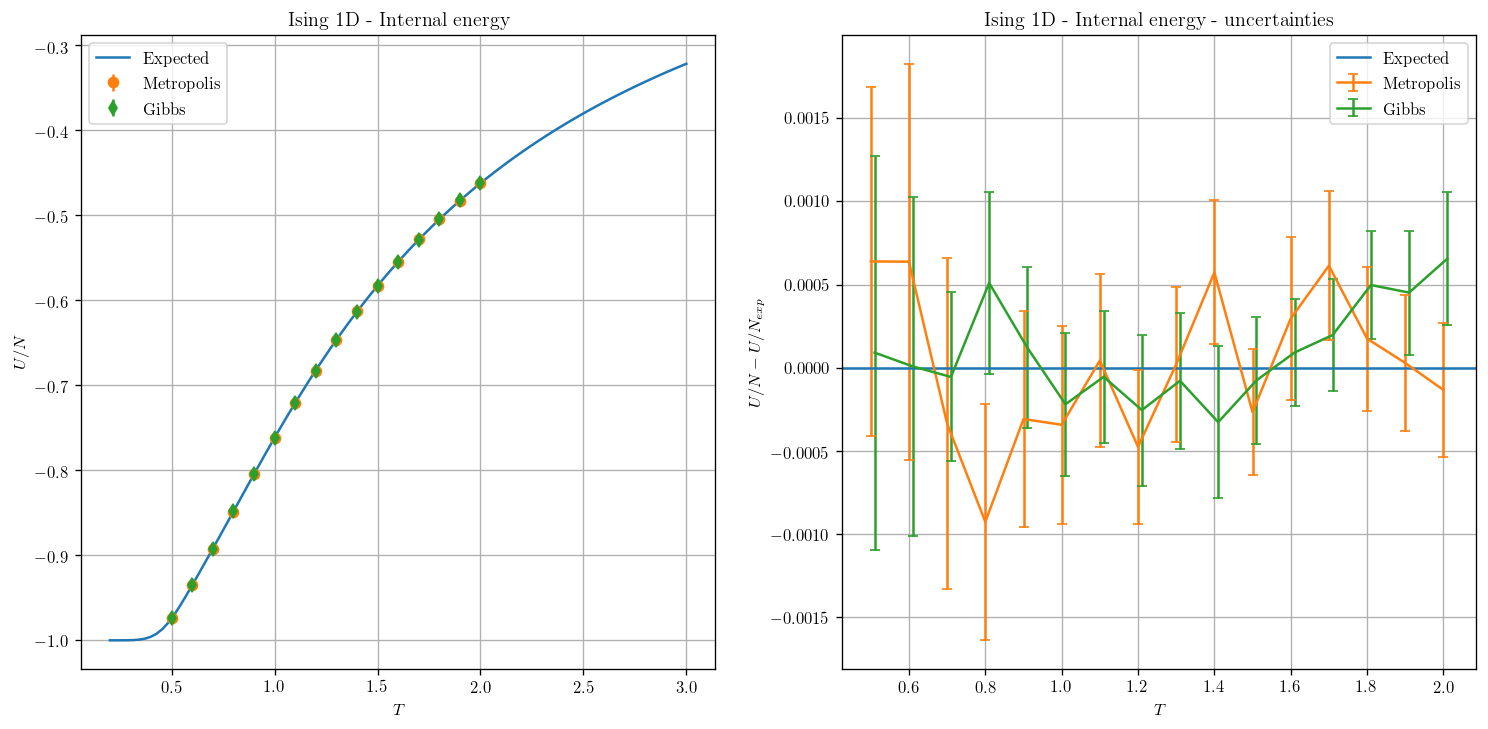

In [4]:
points=100
Texp = np.linspace(0.2,3.0,num=points)
uexp=u(Texp)

Tmetro, umetro, err_umetro=np.loadtxt("Ex_06_1/final_metropolis_nofield.out", delimiter=",", skiprows=1, usecols=(0,3,4), dtype="float,float,float", unpack=True)
Tgibbs, ugibbs, err_ugibbs=np.loadtxt("Ex_06_1/final_gibbs_nofield.out", delimiter=",", skiprows=1, usecols=(0,3,4), dtype="float,float,float", unpack=True)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig, ax=plt.subplots(1,2, figsize=(15,7), dpi=120)

ax[0].plot(Texp, uexp, label="Expected")
ax[0].errorbar(Tmetro, umetro, yerr=err_umetro, linestyle="none", marker="o", label="Metropolis")
ax[0].errorbar(Tgibbs, ugibbs, yerr=err_ugibbs, linestyle="none", marker="d", label="Gibbs")
ax[0].set_title("Ising 1D - Internal energy")
ax[0].set_xlabel(r"$T$")
ax[0].set_ylabel(r"$U/N$")
ax[0].grid(True)
ax[0].legend()

ax[1].set_title("Ising 1D - Internal energy - uncertainties")
ax[1].set_xlabel(r"$T$")
ax[1].set_ylabel(r"$U/N - U/N_{exp}$")
ax[1].grid(True)
ax[1].axhline(0, 0,1, color="C0", label="Expected")
ax[1].errorbar(Tmetro, umetro-u(Tmetro),yerr=err_umetro, color="C1", capsize=3, label="Metropolis")
ebgibbs = ax[1].errorbar(Tgibbs+0.01, ugibbs-u(Tgibbs),yerr=err_ugibbs, color="C2",capsize=3, label="Gibbs")
ax[1].legend()
    
plt.show()

A sinistra è riportato l'andamento dell'energia interna in funzione della temperatura, mentre a destra sono riportate le discrepanze tra i valori simulati e il valore atteso. I valori per il campionamento alla Gibbs sono stati leggermente traslati verso destra per agevolare la lettura del grafico. Si può notare che ogni entrambi i metodi di campionamento portano a risultati compatibili con il valore atteso ad ogni temperatura valutata.

### Capacità termica

Per implementare il calcolo della capacità termica, ho effettuato delle misure anche di $\langle H^2 \rangle$ e ho calcolato $C$ soltanto alla fine della misura di ogni blocco. Questo è necessario in quanto la capacità termica è legata alle fluttuazioni quadratiche dell'energia, non è quindi possibile considerare delle sue misure istantanee (come invece si può fare per l'energia e la magnetizzazione).

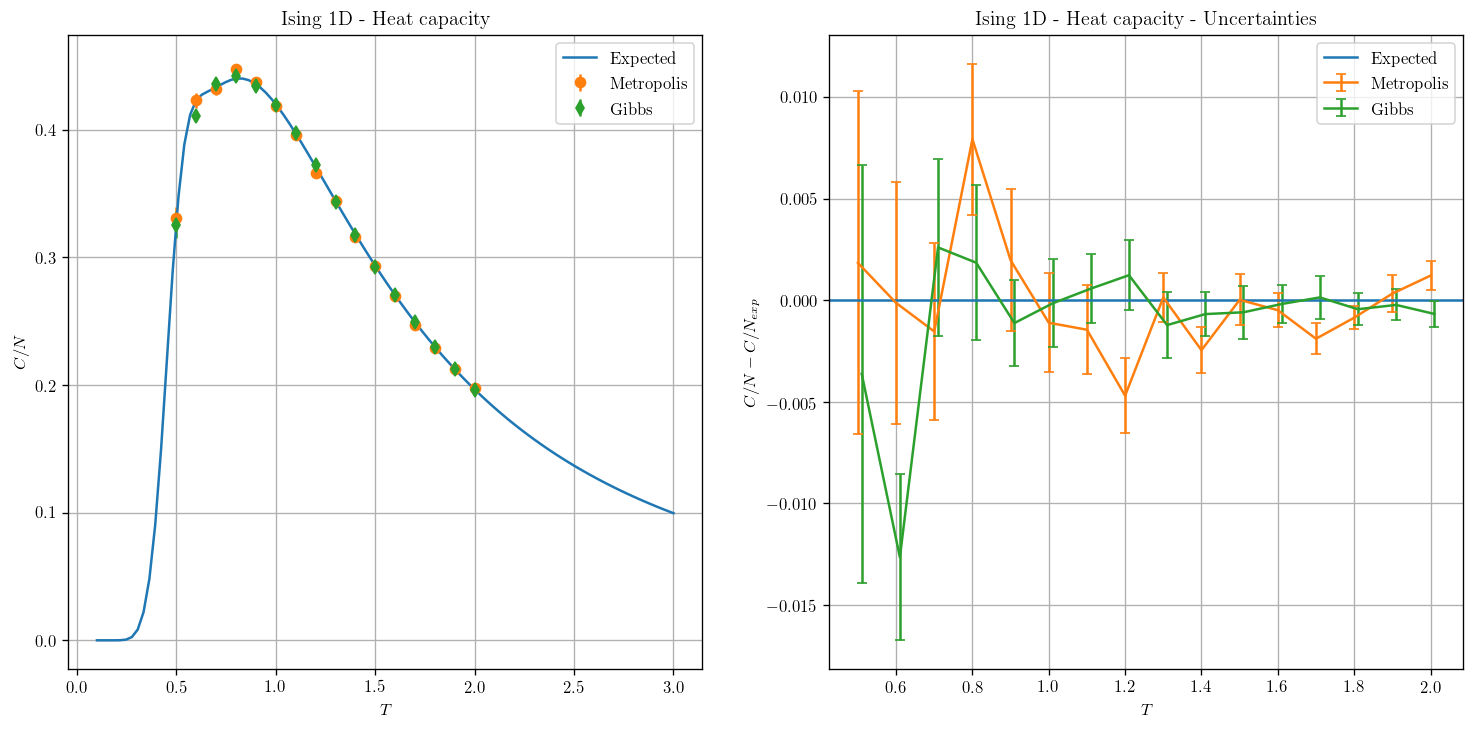

In [14]:
points=100
Texp = np.linspace(0.1,3.0,num=points)
cexp=c(Texp)

Tmetro, cmetro, err_cmetro=np.loadtxt("Ex_06_1/final_metropolis_nofield.out", delimiter=",", skiprows=1, usecols=(0,7,8), dtype="float,float,float", unpack=True)
Tgibbs, cgibbs, err_cgibbs=np.loadtxt("Ex_06_1/final_gibbs_nofield.out", delimiter=",", skiprows=1, usecols=(0,7,8), dtype="float,float,float", unpack=True)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig, ax=plt.subplots(1,2, figsize=(15,7), dpi=120)

ax[0].plot(Texp, cexp, label="Expected")
ax[0].errorbar(Tmetro, cmetro, yerr=err_cmetro, linestyle="none", marker="o", label="Metropolis")
ax[0].errorbar(Tgibbs, cgibbs, yerr=err_cgibbs, linestyle="none", marker="d", label="Gibbs")
ax[0].set_title("Ising 1D - Heat capacity")
ax[0].set_xlabel(r"$T$")
ax[0].set_ylabel(r"$C/N$")
ax[0].grid(True)
ax[0].legend()

ax[1].set_title("Ising 1D - Heat capacity - Uncertainties")
ax[1].set_xlabel(r"$T$")
ax[1].set_ylabel(r"$C/N - C/N_{exp}$")
ax[1].grid(True)
ax[1].axhline(0, 0,1, color="C0", label="Expected")
ax[1].errorbar(Tmetro, cmetro-c(Tmetro),yerr=err_cmetro, color="C1", capsize=3, label="Metropolis")
ebgibbs = ax[1].errorbar(Tgibbs+0.01, cgibbs-c(Tgibbs),yerr=err_cgibbs, color="C2",capsize=3, label="Gibbs")
ax[1].legend()
    
plt.show()

Anche in questo caso valgono le stesse considerazioni fatte per l'energia interna. In questo caso risulta particolarmente evidente come l'algoritmo sia più efficiente a temperature non troppo basse: a parità di estrazioni considerate, l'incertezza risulta molto più piccola per le temperature più alte.

### Suscettività magnetica - Versione "sbagliata"

Avevo inizialmente approcciato il calcolo della suscettività magnetica in modo analogo a quello della capacità termica, ovvero calcolando le fluttuazioni $\langle (\sum_i s_i)^2\rangle-\langle \sum_{s_i}\rangle^2$. Questo è quello che ho ottenuto.

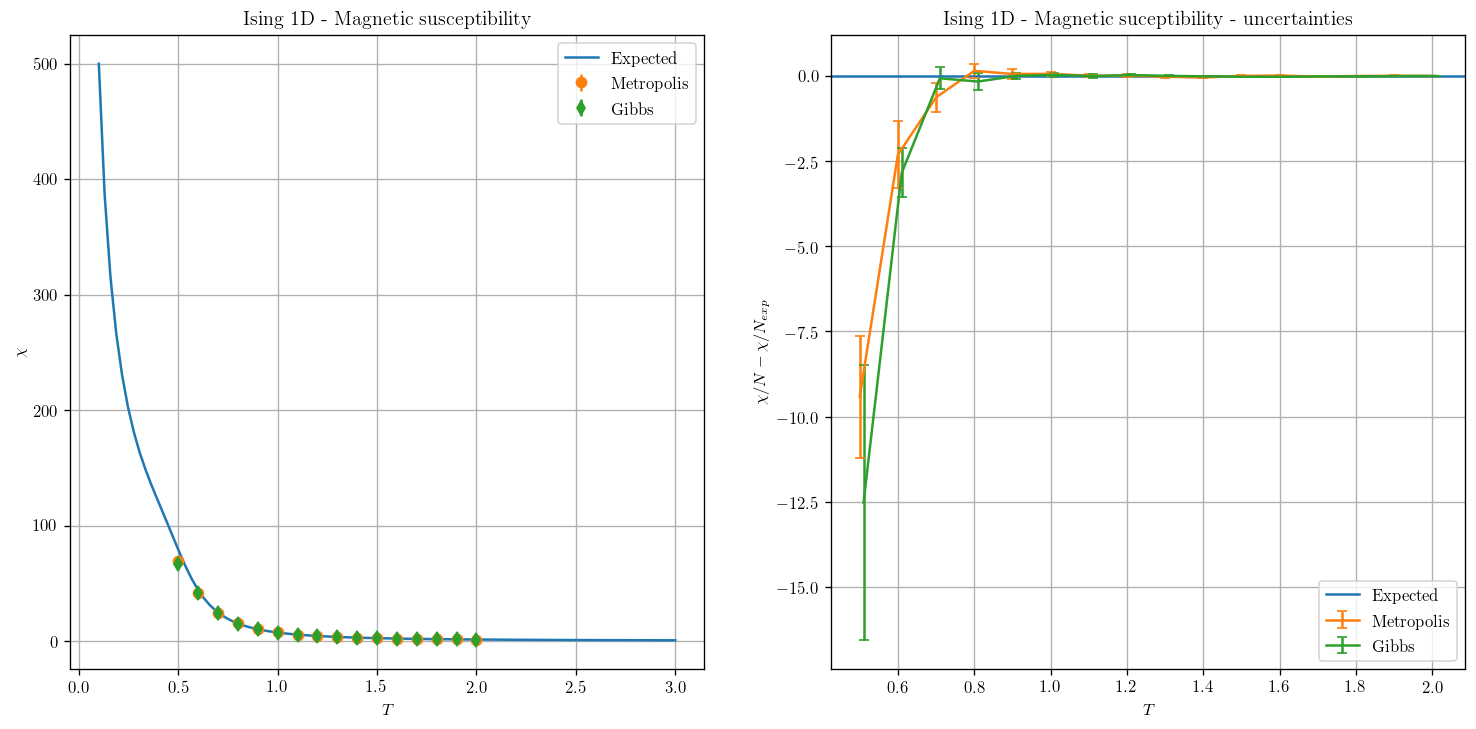

In [16]:
points=100
Texp = np.linspace(0.1,3.0,num=points)
chiexp=chi(Texp)

Tmetro, chimetro, err_chimetro=np.loadtxt("Ex_06_1/final_metropolis_nofield_err.out", delimiter=",", skiprows=1, usecols=(0,9,10), dtype="float,float,float", unpack=True)
Tgibbs, chigibbs, err_chigibbs=np.loadtxt("Ex_06_1/final_gibbs_nofield_err.out", delimiter=",", skiprows=1, usecols=(0,9,10), dtype="float,float,float", unpack=True)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig, ax=plt.subplots(1,2, figsize=(15,7), dpi=120)

ax[0].plot(Texp, chiexp, label="Expected")
ax[0].errorbar(Tmetro, chimetro, yerr=err_chimetro, linestyle="none", marker="o", label="Metropolis")
ax[0].errorbar(Tgibbs, chigibbs, yerr=err_chigibbs, linestyle="none", marker="d", label="Gibbs")
ax[0].set_title("Ising 1D - Magnetic susceptibility")
ax[0].set_xlabel(r"$T$")
ax[0].set_ylabel(r"$\chi$")
ax[0].grid(True)
ax[0].legend()

ax[1].set_title("Ising 1D - Magnetic suceptibility - uncertainties")
ax[1].set_xlabel(r"$T$")
ax[1].set_ylabel(r"$\chi/N - \chi/N_{exp}$")
ax[1].grid(True)
ax[1].axhline(0, 0,1, color="C0", label="Expected")
ax[1].errorbar(Tmetro, chimetro-chi(Tmetro),yerr=err_chimetro, color="C1", capsize=3, label="Metropolis")
ebgibbs = ax[1].errorbar(Tgibbs+0.01, chigibbs-chi(Tgibbs),yerr=err_chigibbs, color="C2",capsize=3, label="Gibbs")
ax[1].legend()
    
plt.show()

Come si può notare ci sono delle incompatibilità a basse temperature. Per capire il motivo di questa discrepanza riporto il grafico della magnetizzazione, che, teoricamente, dovrebbe essere nulla fino a $T=0$.

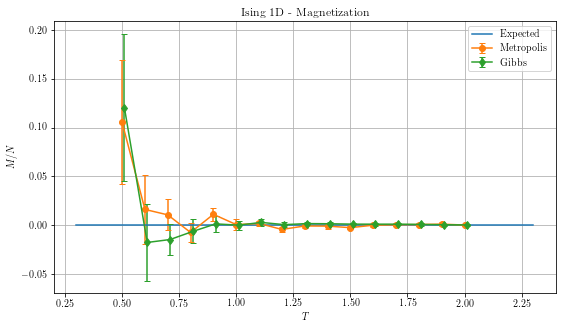

In [30]:
points=100
Texp = np.linspace(0.3,2.3,num=points)
mexp=m(T=Texp,h=0)

Tmetro, mmetro, err_mmetro=np.loadtxt("Ex_06_1/final_metropolis_nofield_err.out", delimiter=",", skiprows=1, usecols=(0,5,6), dtype="float,float,float", unpack=True)
Tgibbs, mgibbs, err_mgibbs=np.loadtxt("Ex_06_1/final_gibbs_nofield_err.out", delimiter=",", skiprows=1, usecols=(0,5,6), dtype="float,float,float", unpack=True)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig, ax=plt.subplots(1,1, figsize=(9,5))

ax.plot(Texp, mexp, label="Expected")
ax.errorbar(Tmetro, mmetro, yerr=err_mmetro, marker="o", label="Metropolis", capsize=3)
ax.errorbar(Tgibbs+0.01, mgibbs, yerr=err_mgibbs, marker="d", label="Gibbs", capsize=3)
ax.set_title("Ising 1D - Magnetization")
ax.set_xlabel(r"$T$")
ax.set_ylabel(r"$M/N$")
ax.grid(True)
ax.legend()
    
plt.show()

Si può notare che a $T=0.5$ si nota una discrepanza al limite della compatibilità. Il sistema tende infatti a perdere ergodicità: a basse temperature le configurazioni possibili sono quelle che hanno quasi tutti gli spin allineati, indipendentemente dalla loro direzione; tuttavia occorrono tempi molto lunghi per visitarle effettivamente tutte, dato che bisognerebbe capovolgere buona parte degli spin.

### Suscettività magnetica - Versione "giusta"

Per correggere l'errore discusso, occorre considerare che, in assenza di campo, si ha $\langle \sum s_i \rangle=0$. Pertanto, in questo caso la suscettività magnetica è semplicemente proporzionale a $\langle (\sum s_i)^2 \rangle$. Sfruttando questa simmetria del problema il calcolo numerico risulta compatibile con i valori attesi.

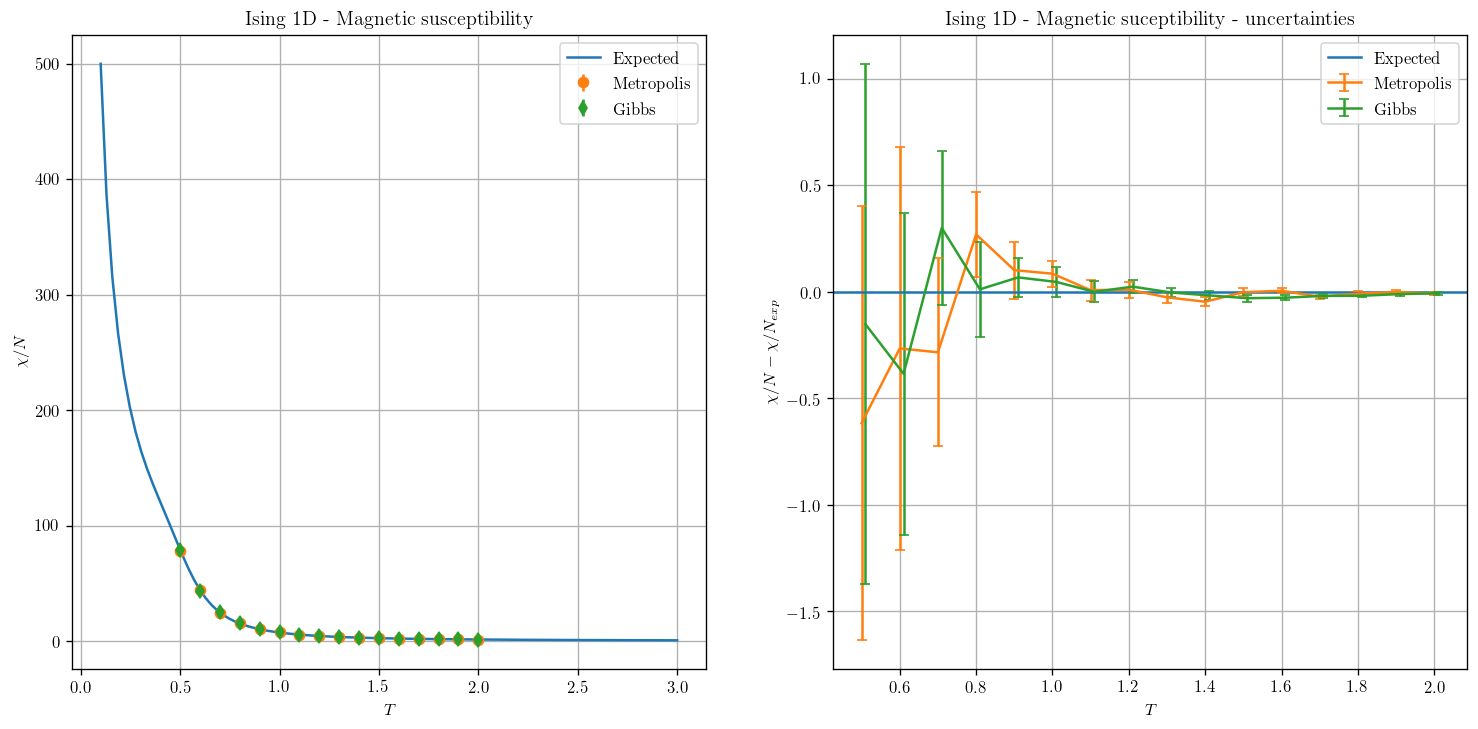

In [28]:
points=100
Texp = np.linspace(0.1,3.0,num=points)
chiexp=chi(Texp)

Tmetro, chimetro, err_chimetro=np.loadtxt("Ex_06_1/final_metropolis_nofield.out", delimiter=",", skiprows=1, usecols=(0,9,10), dtype="float,float,float", unpack=True)
Tgibbs, chigibbs, err_chigibbs=np.loadtxt("Ex_06_1/final_gibbs_nofield.out", delimiter=",", skiprows=1, usecols=(0,9,10), dtype="float,float,float", unpack=True)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig, ax=plt.subplots(1,2, figsize=(15,7), dpi=120)

ax[0].plot(Texp, chiexp, label="Expected")
ax[0].errorbar(Tmetro, chimetro, yerr=err_chimetro, linestyle="none", marker="o", label="Metropolis")
ax[0].errorbar(Tgibbs, chigibbs, yerr=err_chigibbs, linestyle="none", marker="d", label="Gibbs")
ax[0].set_title("Ising 1D - Magnetic susceptibility")
ax[0].set_xlabel(r"$T$")
ax[0].set_ylabel(r"$\chi/N$")
ax[0].grid(True)
ax[0].legend()

ax[1].set_title("Ising 1D - Magnetic suceptibility - uncertainties")
ax[1].set_xlabel(r"$T$")
ax[1].set_ylabel(r"$\chi/N - \chi/N_{exp}$")
ax[1].grid(True)
ax[1].axhline(0, 0,1, color="C0", label="Expected")
ax[1].errorbar(Tmetro, chimetro-chi(Tmetro),yerr=err_chimetro, color="C1", capsize=3, label="Metropolis")
ebgibbs = ax[1].errorbar(Tgibbs+0.01, chigibbs-chi(Tgibbs),yerr=err_chigibbs, color="C2",capsize=3, label="Gibbs")
ax[1].legend()
    
plt.show()

Così come per la capacità termica, anche nel caso della suscettività le incertezze a basse temperature sono sensibilmente maggiori rispetto a quelle ad alte temperature. I risultati della simulazione sono compatibili con quelli attesi ad ogni temperatura.

### Magnetizzazione

Per il calcolo della magnetizzazione in funzione della temperatura occorre introdurre un campo magnetico esterno (senza campo magnetico la magnetizzazione è nulla per ogni temperatura). Nello specifico si è considerato un campo $h=0.02$.

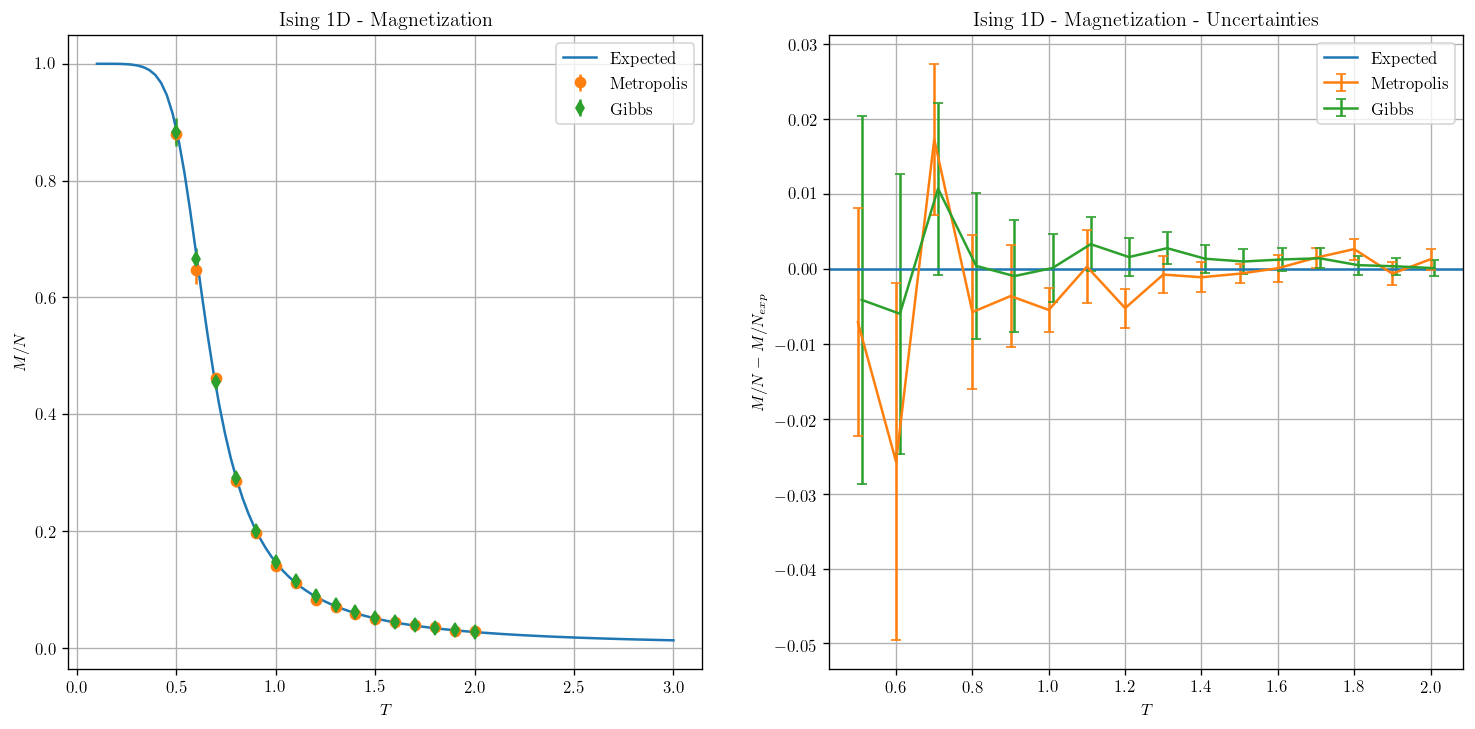

In [32]:
points=100
Texp = np.linspace(0.1,3.0,num=points)
mexp=m(T=Texp,h=0.02)

Tmetro, mmetro, err_mmetro=np.loadtxt("Ex_06_1/final_metropolis_field.out", delimiter=",", skiprows=1, usecols=(0,5,6), dtype="float,float,float", unpack=True)
Tgibbs, mgibbs, err_mgibbs=np.loadtxt("Ex_06_1/final_gibbs_field.out", delimiter=",", skiprows=1, usecols=(0,5,6), dtype="float,float,float", unpack=True)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig, ax=plt.subplots(1,2, figsize=(15,7), dpi=120)

ax[0].plot(Texp, mexp, label="Expected")
ax[0].errorbar(Tmetro, mmetro, yerr=err_mmetro, linestyle="none", marker="o", label="Metropolis")
ax[0].errorbar(Tgibbs, mgibbs, yerr=err_mgibbs, linestyle="none", marker="d", label="Gibbs")
ax[0].set_title("Ising 1D - Magnetization")
ax[0].set_xlabel(r"$T$")
ax[0].set_ylabel(r"$M/N$")
ax[0].grid(True)
ax[0].legend()

ax[1].set_title("Ising 1D - Magnetization - Uncertainties")
ax[1].set_xlabel(r"$T$")
ax[1].set_ylabel(r"$M/N - M/N_{exp}$")
ax[1].grid(True)
ax[1].axhline(0, 0,1, color="C0", label="Expected")
ax[1].errorbar(Tmetro, mmetro-m(T=Tmetro,h=0.02),yerr=err_mmetro, color="C1", capsize=3, label="Metropolis")
ebgibbs = ax[1].errorbar(Tgibbs+0.01, mgibbs-m(T=Tgibbs,h=0.02),yerr=err_mgibbs, color="C2",capsize=3, label="Gibbs")
ax[1].legend()
    
plt.show()

Anche in questo caso le incertezze a bassa temperatura sono maggiori rispetto a quelle ad alte temperatura. I valori simulati sono compatibili con quelli attesi teoricamente ad ogni $T$.

### Acceptance rate

Di qualche interesse può essere anche l'andamento dell'acceptance rate con il campionamento di Metropolis (per il campionamento di Gibbs l'accettazione è sempre $1$) al variare della temperatura, riportato nel grafico sottostante.

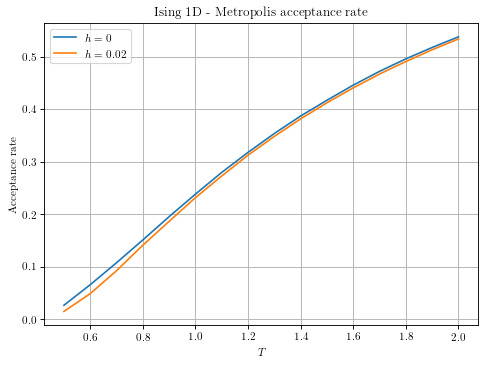

In [12]:
T, alpha=np.loadtxt("Ex_06_1/final_metropolis_nofield.out", delimiter=",", skiprows=1, usecols=(0,2), dtype="float,float", unpack=True)
T_h, alpha_h=np.loadtxt("Ex_06_1/final_metropolis_field.out", delimiter=",", skiprows=1, usecols=(0,2), dtype="float,float", unpack=True)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(7,5),dpi=80)
plt.plot(T, alpha, label="$h=0$")
plt.plot(T_h, alpha_h, label="$h=0.02$")
plt.title("Ising 1D - Metropolis acceptance rate")
plt.xlabel("$T$")
plt.ylabel("Acceptance rate")

plt.legend()
plt.grid(True)

plt.show()

Come si può vedere, al diminuire della temperatura l'acceptance rate diminuisce. Questo è consistente con quanto ci si potrebbe attendere: ad alte temperature è più facile trovare una configurazione accettabile (a temperatura infinita le possibili combinazioni di spin il più disordinate possibili sono tante), mentre a basse temperature diventa sempre più difficile (sono poche le configurazioni in cui tutti gli spin o quasi sono allineati). La differenza con il caso con il campo magnetico acceso non è sostanziale; il fatto che in questo caso l'accettazione sia minore si potrebbe forse interpretare con il fatto che viene rotta la simmetria: senza campo, nel caso limite di $T\to 0$ c'erano due configurazioni possibili (tutti gli spin verso l'alto o tutti verso il basso), in questo caso, invece, ce ne è soltanto una (tutti gli spin nella direazione del campo).